In [1]:
# Importing requied library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset 
df = pd.read_csv("medical_cost_insurance.csv")

In [3]:
#Dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Head of dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#   Name of all columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#  Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df.shape

(1338, 7)

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["charges"], ascending = False, inplace = True)
corr
print(corr['charges'])

Find most important features relative to target
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [15]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='charges', ylabel='Density'>

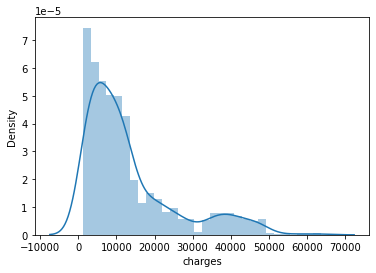

In [16]:
#Data Visualization
sns.distplot(df['charges'])

In [17]:
df['charges'].skew()

1.5158796580240388

In [18]:
#  The above distribution tells us the charge is not normally distributed, 
#  It has high skewness. We will deal with it later. Also most of charges are below 50k

<AxesSubplot:xlabel='sex', ylabel='count'>

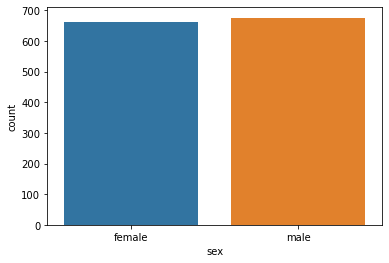

In [19]:
#SEX
sns.countplot(df['sex'])

In [20]:
#   Count of male and female is more or less equal

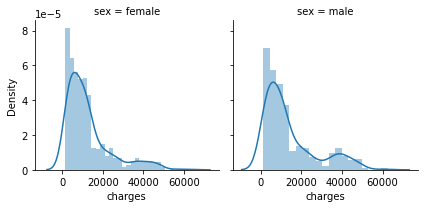

In [21]:
g=sns.FacetGrid(df,col='sex')
g=g.map(sns.distplot,"charges")

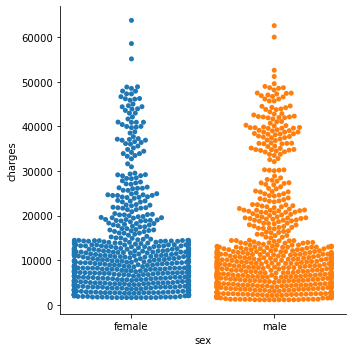

In [22]:
sns.catplot(y = 'charges',x = 'sex',data = df , kind = "swarm")

In [23]:
# It does not look there is any difference in the charging based on sex of an individual. 
# We will explore further with other variable. 
# Till now insurance does not depend if you are male or female.

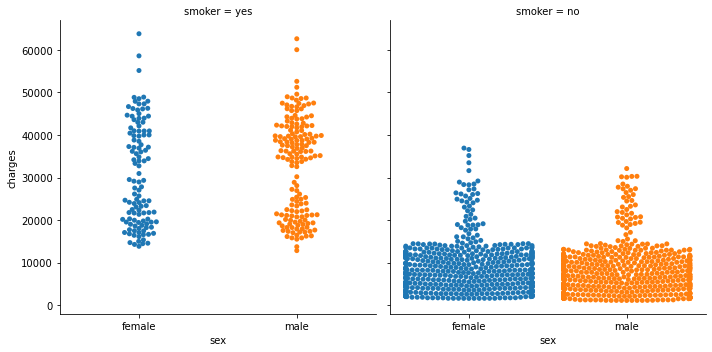

In [24]:
#SMOKER
sns.catplot(y = 'charges',x = 'sex',col = 'smoker',data = df , kind = "swarm")


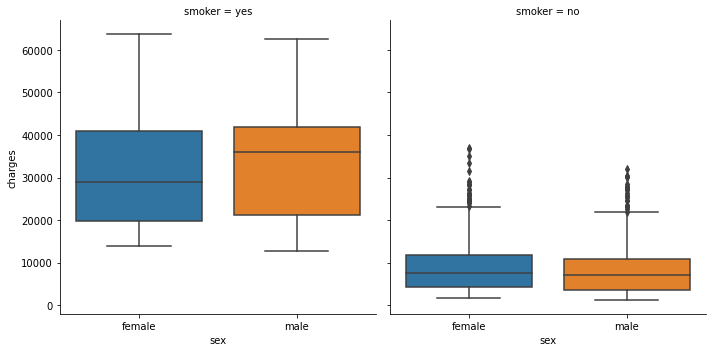

In [25]:
sns.catplot(y = 'charges', x = 'sex', col = 'smoker', data = df , kind = "box")

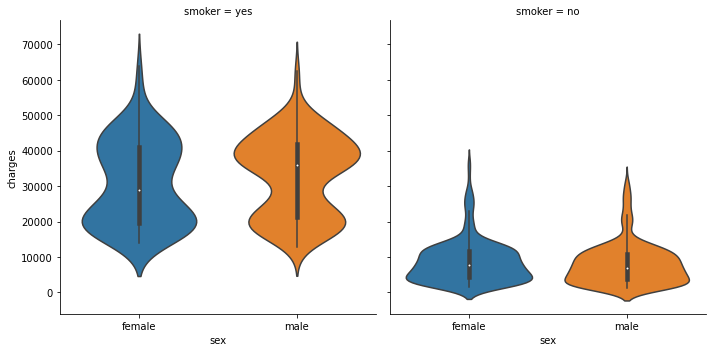

In [26]:
sns.catplot(y = 'charges',x = 'sex',col = 'smoker' , data = df , kind = "violin")

In [27]:
df[(df['smoker']=='yes')&(df['sex']=='male')]['charges'].mean()

33042.00597528302

In [28]:
df[(df['smoker']=='yes')&(df['sex']=='female')]['charges'].mean()

30678.996276260867

In [29]:
#    From the diagram it is clear that smoking has high correlation with charges, if you smoke , 
#    then insurance paid will be high irrespective of gender. Further in the smoking categroy the mean of 
#    male smoker is higher than female smoker, 
#    need to compare with other variable like age and bmi to know why are they charged more than female.

<AxesSubplot:xlabel='age', ylabel='Density'>

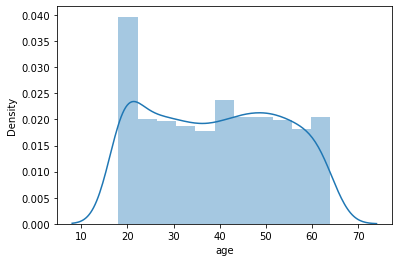

In [30]:
#Age
sns.distplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='charges'>

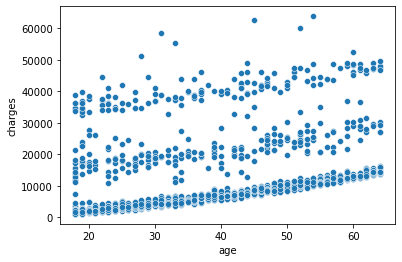

In [31]:
sns.scatterplot(x='age', y='charges',data=df)

In [32]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [33]:
#  From the data it is visible that the minimum age is 18 and the maximum age is 64. 
#  So if we convert this numerical data into categorical data we can get better insight of the data.

#  SO lets convert the age into: 18yrs-26 yrs as young , 
#  27yrs-40yrs as adult,41yrs to 55yrs as senior adult and 56yrs to 64yrs as Elder

In [34]:
df['age_cat']=np.NAN
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 26), 'age_cat'] = 'Young'
    col.loc[(col['age'] > 26) & (col['age'] <= 40), 'age_cat'] = 'Adult'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [35]:
lst

[      age     sex     bmi  children smoker     region      charges  \
 0      19  female  27.900         0    yes  southwest  16884.92400   
 1      18    male  33.770         1     no  southeast   1725.55230   
 2      28    male  33.000         3     no  southeast   4449.46200   
 3      33    male  22.705         0     no  northwest  21984.47061   
 4      32    male  28.880         0     no  northwest   3866.85520   
 ...   ...     ...     ...       ...    ...        ...          ...   
 1333   50    male  30.970         3     no  northwest  10600.54830   
 1334   18  female  31.920         0     no  northeast   2205.98080   
 1335   18  female  36.850         0     no  southeast   1629.83350   
 1336   21  female  25.800         0     no  southwest   2007.94500   
 1337   61  female  29.070         0    yes  northwest  29141.36030   
 
            age_cat  
 0            Young  
 1            Young  
 2            Adult  
 3            Adult  
 4            Adult  
 ...          

In [36]:
df['age_cat'].value_counts()

Senior Adult    421
Adult           367
Young           334
Elder           216
Name: age_cat, dtype: int64

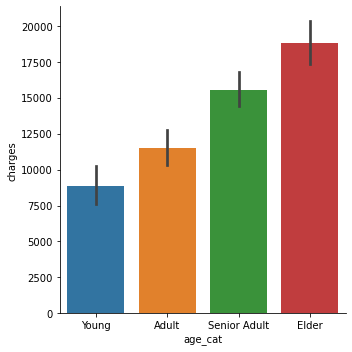

In [37]:
sns.catplot(x='age_cat', y='charges',data=df,kind='bar')

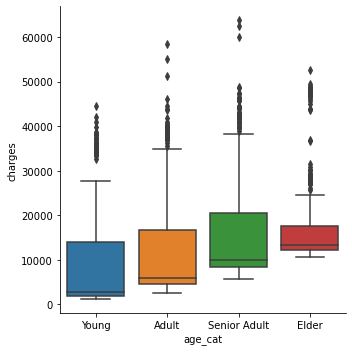

In [38]:
sns.catplot(x='age_cat', y='charges',data=df,kind='box')

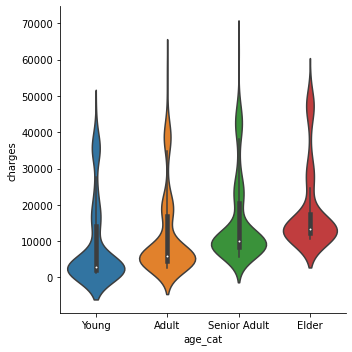

In [39]:
sns.catplot(x='age_cat', y='charges',data=df,kind='violin')

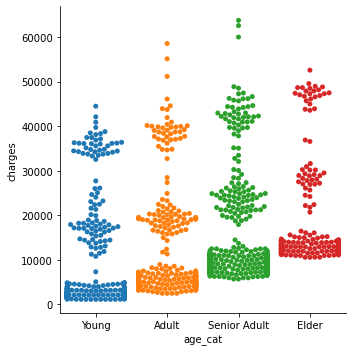

In [40]:
sns.catplot(x='age_cat', y='charges',data=df,kind='swarm')

In [41]:
#    From the above we can now easily see the corelation(ordinal) between age and charges,
#    as the age increase insurance charge increase. 
#    But each group has some high values need to understand the reason, using other features.

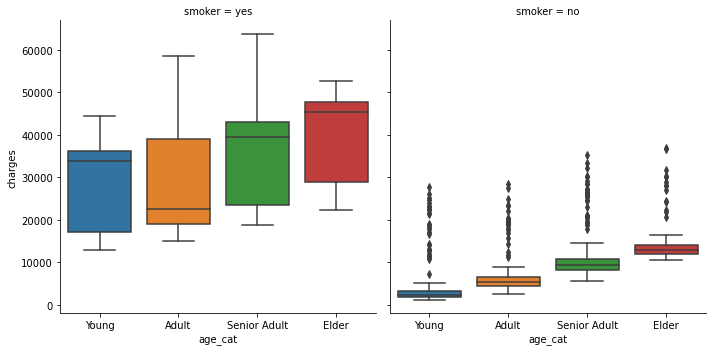

In [42]:
sns.catplot(x='age_cat', y='charges',data=df,kind='box',col='smoker')

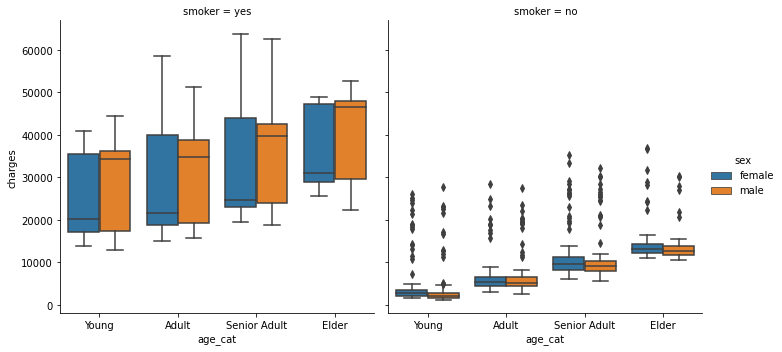

In [43]:
sns.catplot(x='age_cat', y='charges',data=df,kind='box',col='smoker',hue='sex')

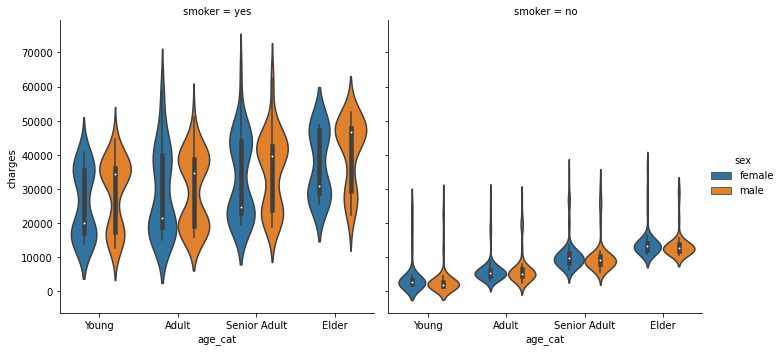

In [44]:
sns.catplot(x='age_cat', y='charges',data=df,kind='violin',col='smoker',hue='sex')

In [45]:
df[(df['age_cat']=='Adult')&(df['smoker']=='yes')&(df['sex']=='male')]['charges'].describe()

count       48.000000
mean     29621.263878
std      10518.151459
min      15820.699000
25%      19312.762675
50%      34739.307450
75%      38821.587575
max      51194.559140
Name: charges, dtype: float64

In [46]:
df[(df['age_cat']=='Adult')&(df['smoker']=='yes')&(df['sex']=='female')]['charges'].describe()

count       33.000000
mean     28947.918231
std      12586.295075
min      15006.579450
25%      18765.875450
50%      21659.930100
75%      39836.519000
max      58571.074480
Name: charges, dtype: float64

In [47]:
#   So from this we can confirm that non smoker of any age has low insurance charges in comparison to smokers.

#  In non smoker category, Males has slightly less insurance cost in comparison to female. 2)in smoker category, mean cost of male are higher than female.



In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young
1,18,male,33.770,1,no,southeast,1725.55230,Young
2,28,male,33.000,3,no,southeast,4449.46200,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


<AxesSubplot:xlabel='bmi', ylabel='charges'>

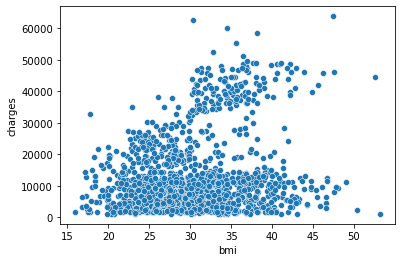

In [49]:
#BMI
sns.scatterplot(x='bmi',y='charges',data=df)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

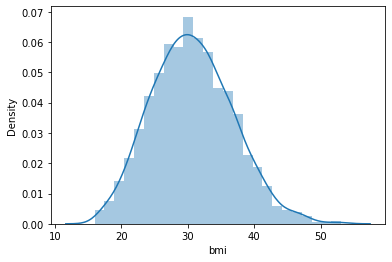

In [50]:
sns.distplot(df['bmi'])

In [51]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [52]:
#    If we see a BMI chart, there is 5 classes, 15 to 18 is underweight , 
#    19 to 24 is healthy ,25 to 29 is overweight ,30 to 39 is obese and greater than 40 is extremly obese.
#    So we will divide our data into that categories.

In [53]:
df.loc[(df['bmi']>= 15)&(df['bmi']<19), 'bmi_cat'] = 'underweight'
df.loc[(df['bmi']>= 19)&(df['bmi']<25), 'bmi_cat'] = 'healthy'
df.loc[(df['bmi']>= 25)&(df['bmi']<30), 'bmi_cat'] = 'overweight'
df.loc[(df['bmi']>= 30)&(df['bmi']<40), 'bmi_cat'] = 'obese'
df.loc[(df['bmi']>= 40), 'bmi_cat'] = 'ext_obese'

In [54]:
df['bmi_cat'].value_counts()

obese          616
overweight     386
healthy        221
ext_obese       91
underweight     24
Name: bmi_cat, dtype: int64

In [55]:
df['bmi_cat'].unique()

array(['overweight', 'obese', 'healthy', 'ext_obese', 'underweight'],
      dtype=object)

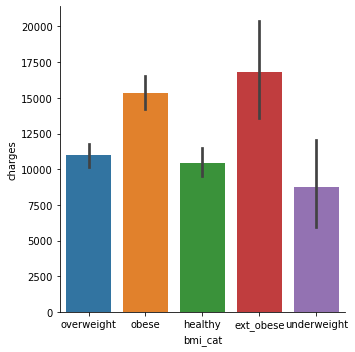

In [56]:
sns.catplot(x='bmi_cat',y='charges',kind='bar',data=df)


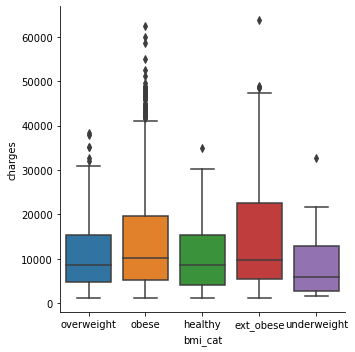

In [57]:
sns.catplot(x='bmi_cat',y='charges',kind='box',data=df)


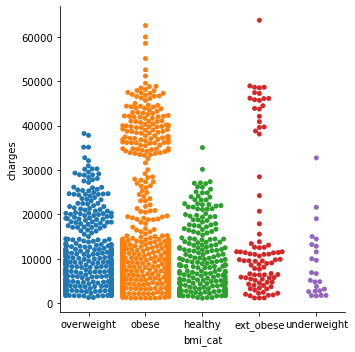

In [58]:
sns.catplot(x='bmi_cat',y='charges',kind='swarm',data=df)


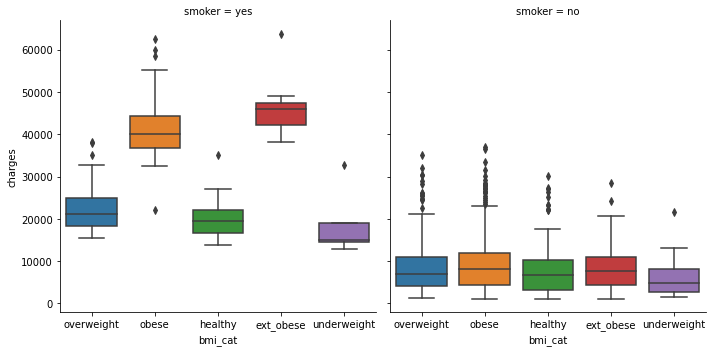

In [59]:
sns.catplot(x='bmi_cat',y='charges',col='smoker',kind='box',data=df)


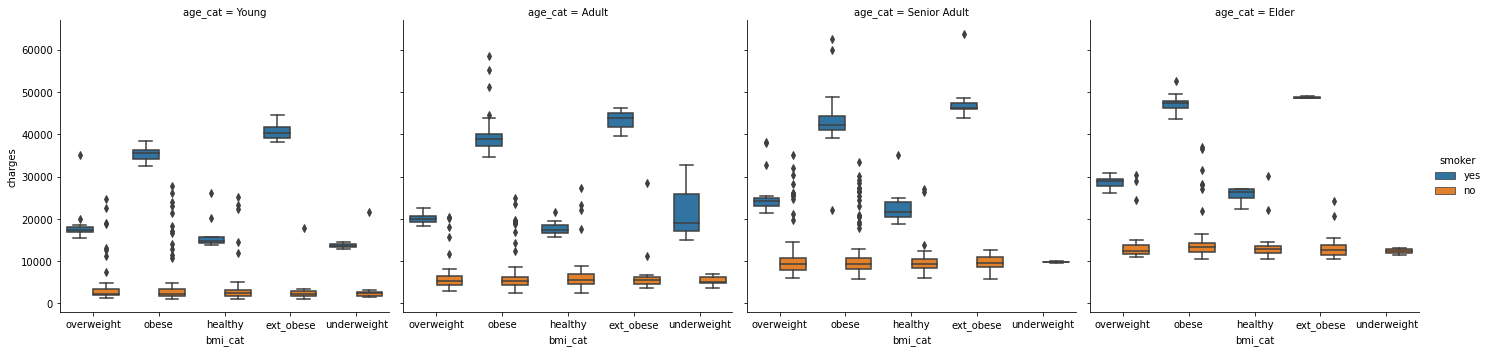

In [60]:
sns.catplot(x='bmi_cat',y='charges',col='age_cat',hue='smoker',kind='box',data=df)


In [61]:
#   In all age category one thing is common, 
#   if you are obese or more and you smoke the expense will be very high. 
#   The same is applicabe for overweight and healthy but the ratio of increase is lesser than obese. 
#   Further with increasein age, expense increases as we have seen earlier.



<AxesSubplot:xlabel='children', ylabel='count'>

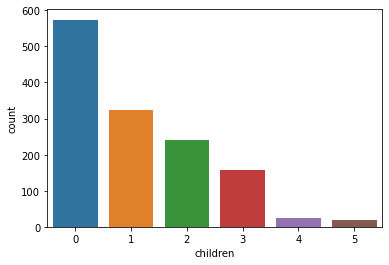

In [62]:
#CHILDREN
sns.countplot(df['children'])

<AxesSubplot:xlabel='children', ylabel='charges'>

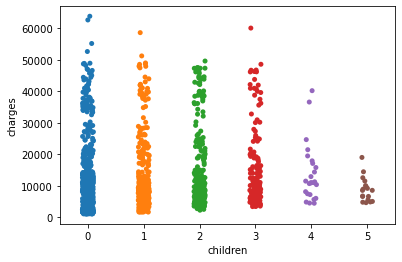

In [63]:
sns.stripplot(x="children", y="charges", data=df, size = 5, jitter = True)


In [64]:
df['children'].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [65]:
df['children']=df['children'].map({0:'0',1:'1',2:'2',3:'3+',4:'3+',5:'3+'})


In [66]:
df['children'].value_counts()


0     574
1     324
2     240
3+    200
Name: children, dtype: int64

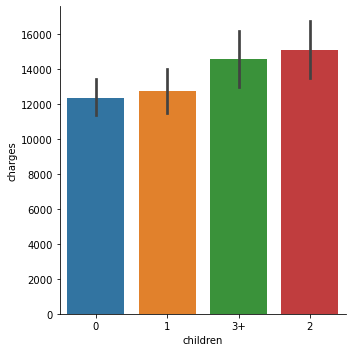

In [67]:
sns.catplot(x='children',y='charges',data=df,kind='bar')


In [68]:
#  if people tend to quit smoking or dont smoke if they have children

<AxesSubplot:xlabel='children', ylabel='count'>

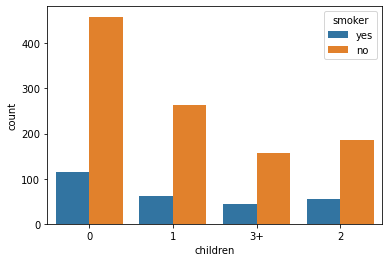

In [69]:
sns.countplot(x='children',hue='smoker',data=df)


In [70]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [71]:
#    No children present or not people do smoke



In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight


In [73]:
#   Lets see if you have more children then do you get good time to take care of yourselve, 
#   eat well, do workout etc..or you dont get time and time and get overweight.

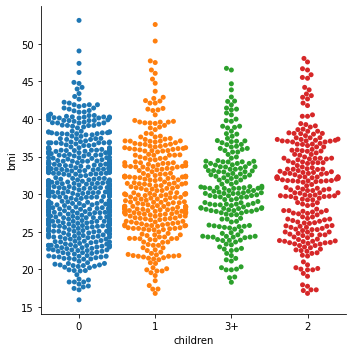

In [74]:
sns.catplot(x='children',y='bmi',data=df,kind='swarm')


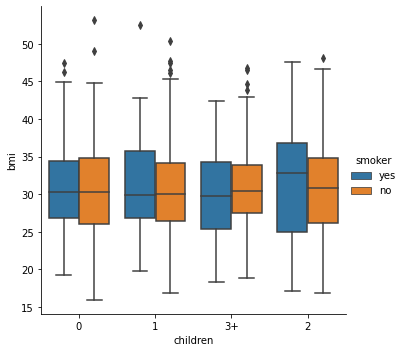

In [75]:
sns.catplot(x='children',y='bmi',hue='smoker',data=df,kind='box')


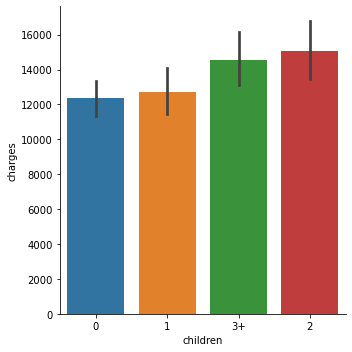

In [76]:
sns.catplot(x='children',y='charges',data=df,kind='bar')


In [77]:
#   It looks like having children dont affect your BMI. 
#   However with increase in no of children medical expense increases. 
#   but if you see above distribution we can safely say having 0 or 1 child expnse is more or less equal, 
#   similarly having 2 or more child expense will be similar. 
#    So lets disribute into two part. 'less' if no of children is less than equal to 1 and 'more; if it is greater than equal to 2.



In [78]:
df['child_cat']=np.NAN
df.loc[(df['children']=='0')|(df['children']=='1'), 'child_cat'] = 'less'
df.loc[(df['children']=='2')|(df['children']=='3+'), 'child_cat'] = 'more'

In [79]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat,child_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight,less
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese,less
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese,more
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy,less
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,less


In [80]:
#REGION
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [81]:
#    distribution of smoker based on region

<AxesSubplot:xlabel='region', ylabel='count'>

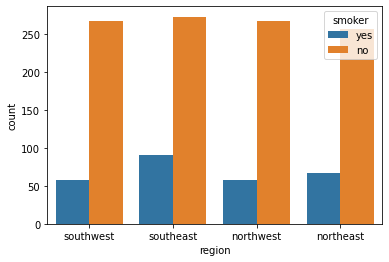

In [82]:
sns.countplot(x='region',hue='smoker',data=df)


In [83]:
#    Southeast has the maximum no of smoker followed by northeast , 
#    thus the charges will also be high for southeast followed by northeast.


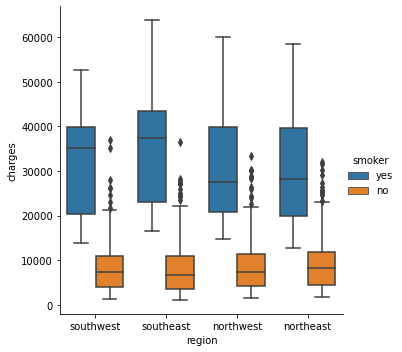

In [84]:
sns.catplot(x='region',y='charges',hue='smoker',data=df,kind='box')


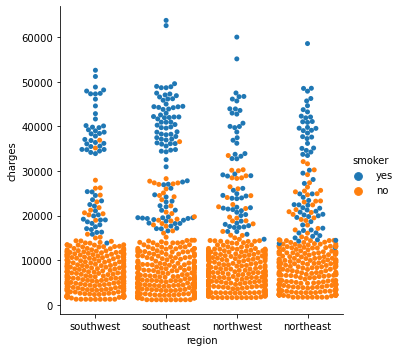

In [85]:
sns.catplot(x='region',y='charges',hue='smoker',data=df,kind='swarm')


In [86]:
#    southeast had maximum no of smoker followed by northeast, charges are higher for southeast.



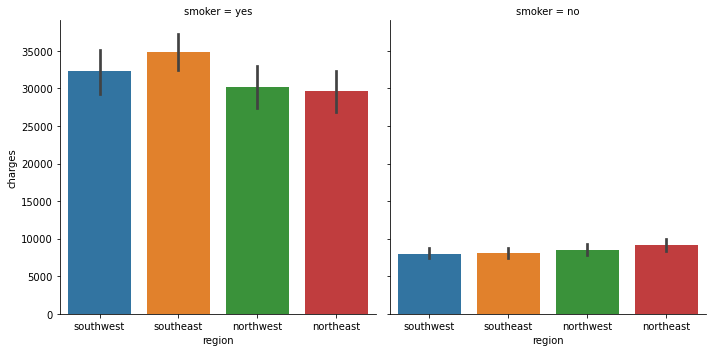

In [87]:
sns.catplot(x='region',y='charges',col='smoker',data=df,kind='bar')


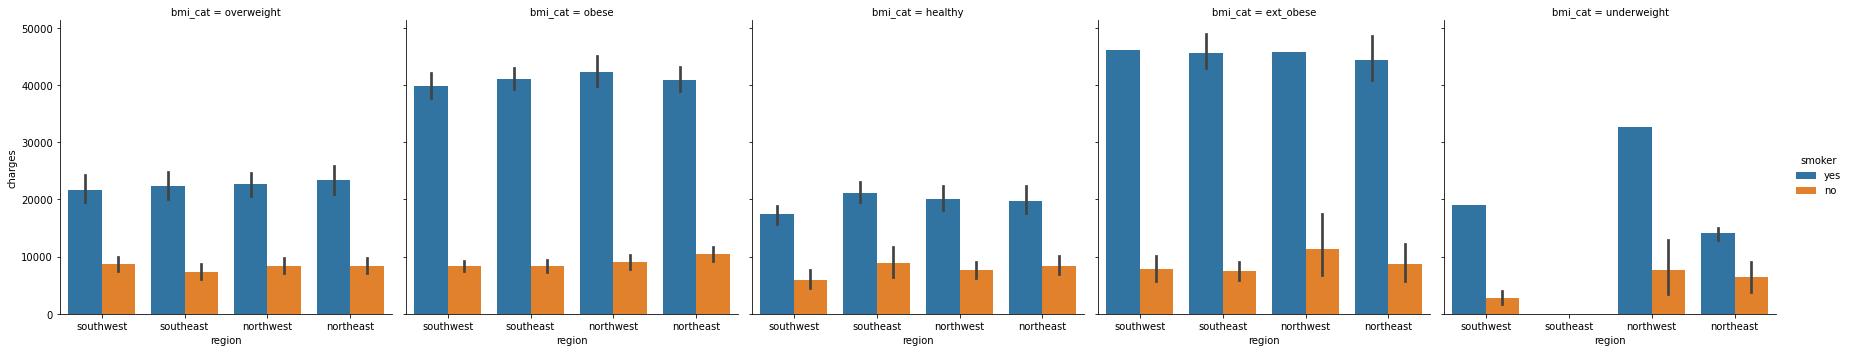

In [88]:
sns.catplot(x='region',y='charges',col='bmi_cat',hue='smoker',data=df,kind='bar')


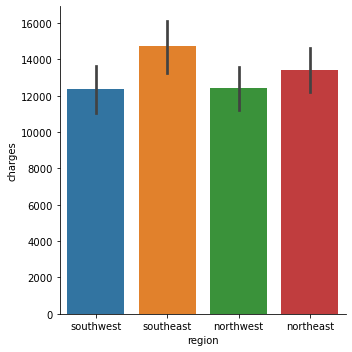

In [89]:
sns.catplot(x='region',y='charges',data=df,kind='bar')


In [90]:
# We cannot find any trend in charges based on region, when we are consider all the factors. 
#  thus we will one hot code this feature.



In [91]:
df1=df.copy()

In [92]:
#   FEATURE ENGINEERING
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,bmi_cat,child_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young,overweight,less
1,18,male,33.770,1,no,southeast,1725.55230,Young,obese,less
2,28,male,33.000,3+,no,southeast,4449.46200,Adult,obese,more
3,33,male,22.705,0,no,northwest,21984.47061,Adult,healthy,less
4,32,male,28.880,0,no,northwest,3866.85520,Adult,overweight,less


In [93]:
df1=df1.drop(['age','bmi','children'],axis=1)


In [94]:
df1['age_cat'].unique()


array(['Young', 'Adult', 'Senior Adult', 'Elder'], dtype=object)

In [95]:
df1['bmi_cat'].unique()


array(['overweight', 'obese', 'healthy', 'ext_obese', 'underweight'],
      dtype=object)

In [96]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   smoker     1338 non-null   object 
 2   region     1338 non-null   object 
 3   charges    1338 non-null   float64
 4   age_cat    1338 non-null   object 
 5   bmi_cat    1338 non-null   object 
 6   child_cat  1338 non-null   object 
dtypes: float64(1), object(6)
memory usage: 73.3+ KB


In [97]:
df1['age_cat']=df1['age_cat'].map({'Young':0, 'Adult':1, 'Senior Adult':2, 'Elder':3})
df1['bmi_cat']=df1['bmi_cat'].map({'underweight':0, 'healthy':1, 'overweight':2, 'obese':3,'ext_obese':4})
df1['child_cat']=df1['child_cat'].map({'less':0, 'more':1})

In [98]:
#data_hot=data1[['sex','smoker','region','age_cat','bmi_cat','child_cat']]


In [99]:
#data_hot1 = pd.get_dummies(data_hot)


In [100]:
#data_final=pd.concat([data_hot1,data1['charges']],axis=1)


In [101]:
df1.head()


,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,yes,southwest,16884.92400,0,2,0
1,male,no,southeast,1725.55230,0,3,0
2,male,no,southeast,4449.46200,1,3,1
3,male,no,northwest,21984.47061,1,1,0
4,male,no,northwest,3866.85520,1,2,0


In [102]:
df1['smoker']=df1['smoker'].map({'no':0, 'yes':1})


In [103]:
df1.head()


,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0


In [104]:
df_hot = pd.get_dummies(df1['region'])
df_hot1 = pd.get_dummies(df1['sex'])

In [105]:
df1

,sex,smoker,region,charges,age_cat,bmi_cat,child_cat
0,female,1,southwest,16884.92400,0,2,0
1,male,0,southeast,1725.55230,0,3,0
2,male,0,southeast,4449.46200,1,3,1
3,male,0,northwest,21984.47061,1,1,0
4,male,0,northwest,3866.85520,1,2,0
...,...,...,...,...,...,...,...
1333,male,0,northwest,10600.54830,2,3,1
1334,female,0,northeast,2205.98080,0,3,0
1335,female,0,southeast,1629.83350,0,3,0
1336,female,0,southwest,2007.94500,0,2,0


In [106]:
df1=df1.drop(['region','sex'],axis=1)


In [107]:
df_final=pd.concat([df1,df_hot,df_hot1],axis=1)


In [108]:
df_final.head()

,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


In [109]:
#   Now the final part, we will work on charges. Let check the skewness.


 mu = 13270.42 and sigma = 12105.48



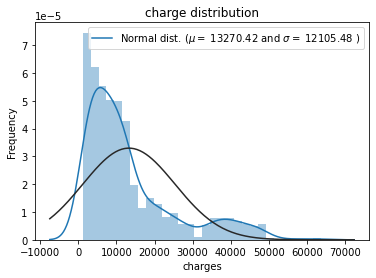

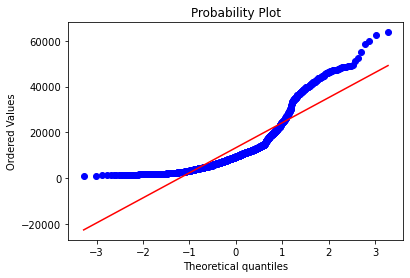

In [110]:
#Skewness of dependent variable
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df['charges'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_final['charges'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('charge distribution')

fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt)
plt.show()

In [111]:
df_final.head()


,smoker,charges,age_cat,bmi_cat,child_cat,northeast,northwest,southeast,southwest,female,male
0,1,16884.92400,0,2,0,0,0,0,1,1,0
1,0,1725.55230,0,3,0,0,0,1,0,0,1
2,0,4449.46200,1,3,1,0,0,1,0,0,1
3,0,21984.47061,1,1,0,0,1,0,0,0,1
4,0,3866.85520,1,2,0,0,1,0,0,0,1


In [112]:
df_final.shape


(1338, 11)

In [113]:
#Modelling
Df_out=df_final['charges']
input_df=df_final.drop(['charges'],axis=1)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(input_df)

In [127]:
r2_Scores = []
models1 = ['Linear Regression' , 'GradientBoosting Regression' ,'DecisionTreeRegressor','SVR','RandomForestRegressor','KNeighbours Regression']

In [128]:
#df_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(input_df,Df_out,test_size=0.10)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.10)


In [129]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
#print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 1204
Number of data points in test data: 134


In [130]:
df_final.shape

(1338, 11)

In [131]:
#Standarization
# X_train.describe()
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
#y_cv= y_cv.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
#X_cv = sc_X.fit_transform(X_cv)
#y_cv = sc_y.fit_transform(y_cv)

In [132]:
#Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)
# print the intercept
print(lm.intercept_)

LinearRegression()
[-1.08532996e-16]


In [133]:
print(lm.coef_)

[[ 0.7895031   0.2741174   0.16372575  0.05959598  0.01992413  0.0031785
  -0.01125218 -0.0114685   0.00270219 -0.00270219]]


In [134]:
lm_pred = lm.predict(X_test)
lm_pred= lm_pred.reshape(-1,1)
print("accuracy: "+ str(lm.score(X_test,y_test)*100) + "%")

accuracy: 74.77617539424067%


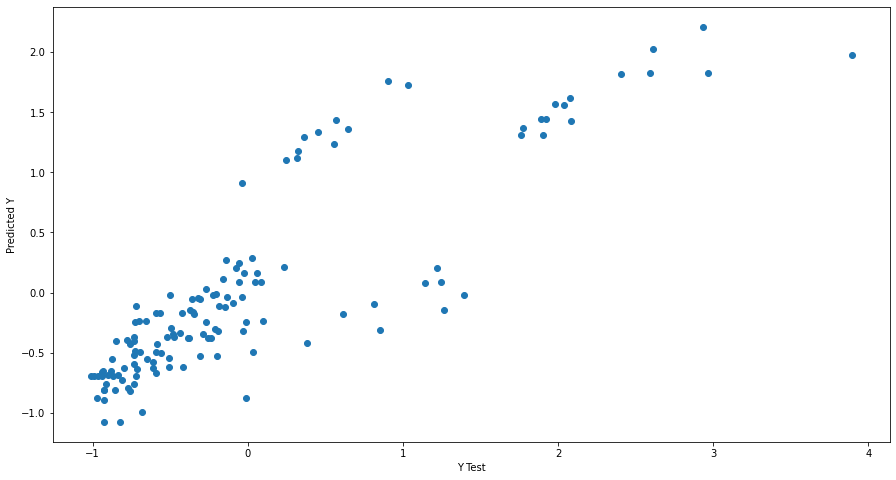

In [135]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lm_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [140]:
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
r2=r2_score(y_test, lm_pred)
print('MAE:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.3648775141839183
MSE: 0.2522382460575933
RMSE: 0.5022332586135583
r2 score: 0.7477617539424066


In [142]:
#   Gradient Boosting

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=4,
                          n_estimators=500)

In [143]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [144]:
r2=r2_score(y_test, clf_pred)
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.23906820385373262
MSE: 0.1645374992830773
RMSE: 0.40563222170221797
r2 score: 0.8354625007169227


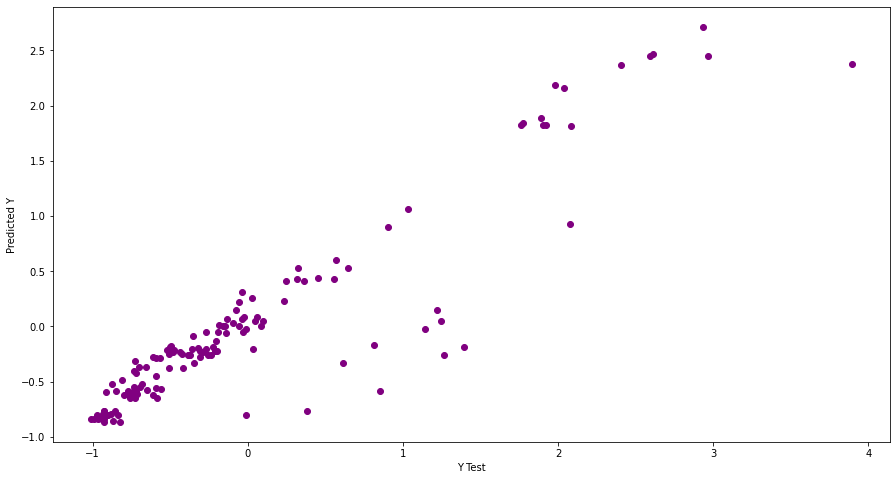

In [169]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'purple')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [146]:
#    DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [147]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [148]:
r2=r2_score(y_test, dtr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.2882497775762139
MSE: 0.2210303116405216
RMSE: 0.47013860896603843
r2 score: 0.7789696883594784


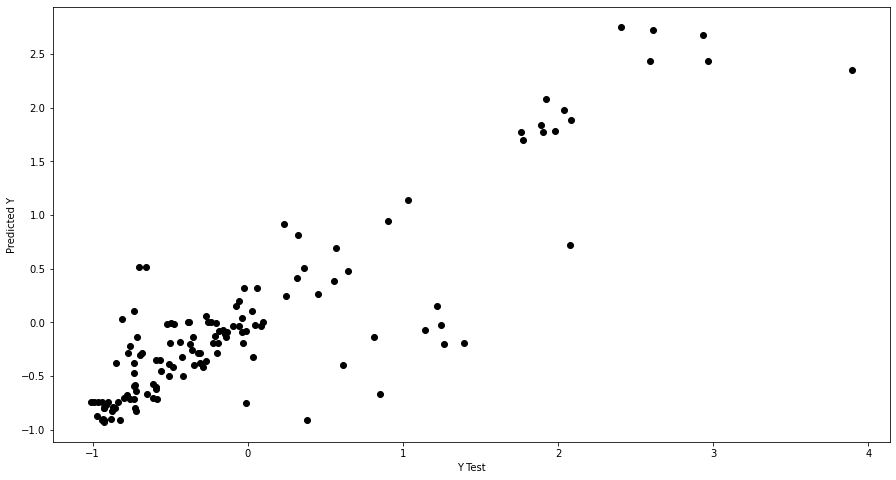

In [166]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [150]:
#   SVR
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [151]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [152]:
r2=r2_score(y_test, svr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.22671117128396506
MSE: 0.1671704572390494
RMSE: 0.4088648398175727
r2 score: 0.8328295427609506


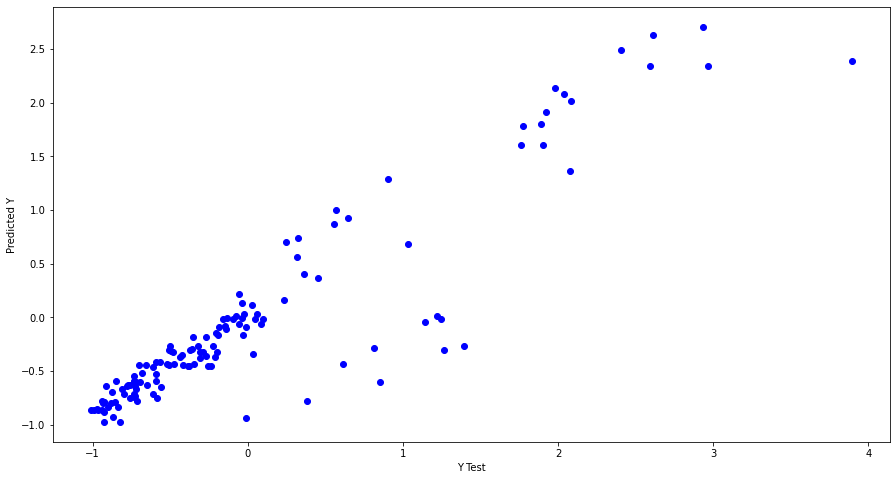

In [165]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [154]:
#   RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500, random_state=0)

In [155]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [156]:
r2=r2_score(y_test, rfr_pred)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.27899579600773183
MSE: 0.20421394077683414
RMSE: 0.4519003659843994
r2 score: 0.7957860592231658


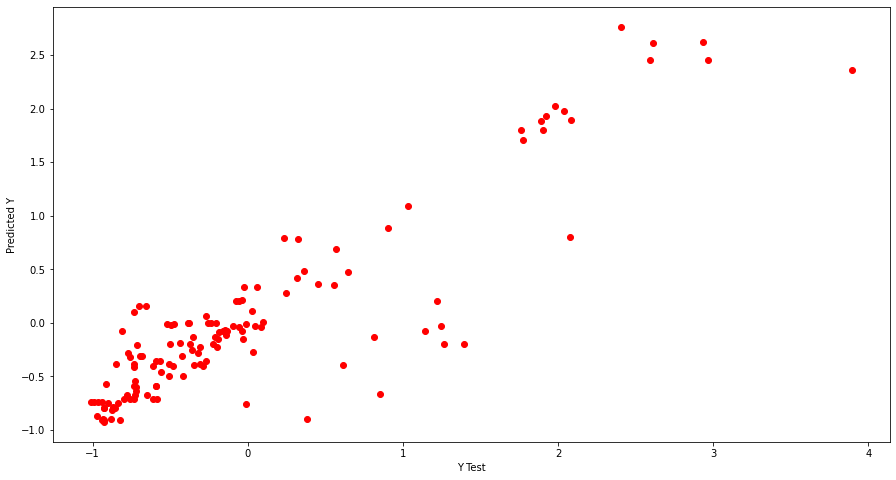

In [164]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [159]:
#   KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


###### KNeighbours Regression ######
Score : 0.7607
[0.84205121 0.80815756 0.72364526 0.73668834 0.81039795]

MSE    : 0.24 
MAE    : 0.32 
RMSE   : 0.49 
R2     : 0.76 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [160]:
from sklearn.model_selection import GridSearchCV
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.7607
R2     : 0.76 


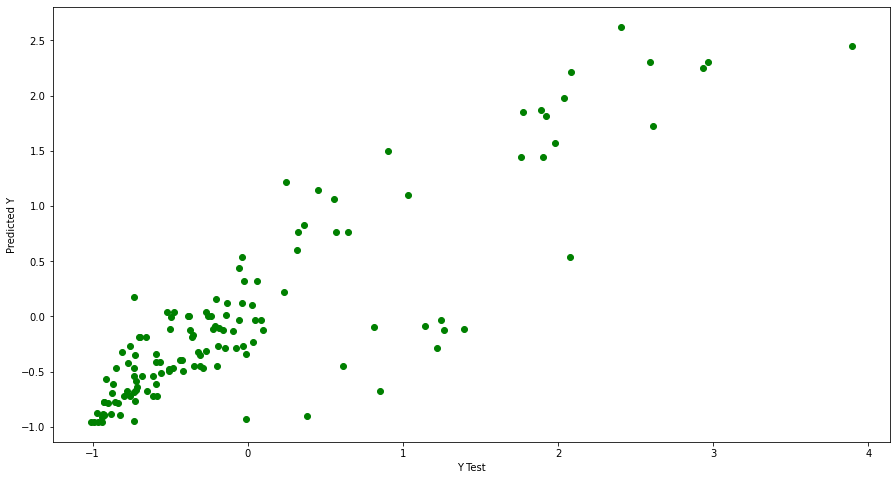

In [163]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [162]:
compare = pd.DataFrame({'Algorithms' : models1 , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)
compare

,Algorithms,R2-Scores
0,Linear Regression,0.747762
1,GradientBoosting Regression,0.835463
2,DecisionTreeRegressor,0.778970
3,SVR,0.832830
4,RandomForestRegressor,0.795786
5,KNeighbours Regression,0.760658
